# slack interactions analysis during COVID19 outbreadk

We make analysis slack data from OpenCovid from jogl. 
First we create dataframe from json files extracted from slack.

In [5]:
#

#import necessary libraries
import requests
import pandas as pd
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import numpy as np
from dfply import *

#create Data Frame using the response obtained as paramter and return it
def APIdataframe(response):
  #Check, and evaluate only if the status of request is successful (200 = success)
    if response.status_code ==200:
        myMessagesList=[]
        data = response.json()

        for i in data:
            for j in i:
                myMessagesList.append([j['user_nickname'], j['msg_day'], j['msg_frequency']])
            #print(myMessagesList)
        
        df = pd.DataFrame(myMessagesList, columns = ['nick', 'day', 'freq'])
        return df
    
    else:
        print("Error getting API data")
        exit(1)



In [4]:
# Calling the API
linkAPI = ''
response= requests.get(linkAPI)#("http://127.0.0.1:8000/interaction")

#send the response data to the function APIdataframe and store its returned dataframe to df
df = APIdataframe(response)

MissingSchema: Invalid URL '': No schema supplied. Perhaps you meant http://?

# Get data from JSON files

From direct stored files.

In [2]:
# load data for wards with IMD score
filepath = 'C:/Users/lyubo/Documents/DATA_networks/covid19/OpenCOVID19_19_03/proj-dev-open-source-resources/2020-03-11.json' #"C:/Users/tupikina/Documents/Datasets/Dataward/2010_Ward_IMD.json"

with open(filepath) as f:
    slack = json.load(f)
#ward_2010_data

df = pd.DataFrame(slack)
print(df.shape)
df.head(10)

#df.use
#2020-03-17

(21, 23)


type          subtype                 ts       user  \
0  message     channel_join  1583960349.000200  UV8HN81LM   
1  message  channel_purpose  1583960349.000300  UV8HN81LM   
2  message     channel_join  1583960356.000500  UV20M5HGQ   
3  message     channel_join  1583960387.000800  UV0QTJCMT   
4  message     channel_join  1583960450.001000  UVAP0J75L   
5  message     channel_join  1583960450.001200  UV8T52QJ3   
6  message     channel_join  1583960450.001400  UV71KBVRN   
7  message              NaN  1583962108.025700  UV8HN81LM   
8  message              NaN  1583962932.027300  UV20M5HGQ   
9  message              NaN  1583974257.033800  UV8T52QJ3   

                                                text     purpose    inviter  \
0                <@UV8HN81LM> has joined the channel         NaN        NaN   
1   <@UV8HN81LM> set the channel purpose: Lose chat.  Lose chat.        NaN   
2                <@UV20M5HGQ> has joined the channel         NaN  UV8HN81LM   
3                <@UV0QTJCMT> has joined the channel         NaN  UV8HN81LM   
4                <@UVAP0J75L> has joined the channel         NaN  UV8HN81LM   
5                <@UV8T52QJ3> has joined the channel         NaN  UV8HN81LM   
6                <@UV71KBVRN> has joined the channel         NaN  UV8HN81LM   
7  Hi y'all.\n\ntl;dr : I turned my own panic, in...         NaN        NaN   
8  That is all so true Kamil, competing for money...         NaN        NaN   
9  Hello Kamil. We (bioinformatics developers) ne...         NaN        NaN   

                          client_msg_id       team  user_team  ...  \
0                                   NaN        NaN        NaN  ...   
1                                   NaN        NaN        NaN  ...   
2                                   NaN        NaN        NaN  ...   
3                                   NaN        NaN        NaN  ...   
4                                   NaN        NaN        NaN  ...   
5                                   NaN        NaN        NaN  ...   
6                                   NaN        NaN        NaN  ...   
7  ce0fa66d-fc35-4e16-9608-27c4bf2bee7f  TUU48M0T1  TUU48M0T1  ...   
8  9d2b141d-fe8e-4cbc-b1d4-3549bd44d4c5  TUU48M0T1  TUU48M0T1  ...   
9  cf107d20-6c59-4323-b75d-8dc0eadc77b5  TUU48M0T1  TUU48M0T1  ...   

                                              blocks  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5                                                NaN   
6                                                NaN   
7  [{'type': 'rich_text', 'block_id': 'T6e+y', 'e...   
8  [{'type': 'rich_text', 'block_id': 'eKxw', 'el...   
9  [{'type': 'rich_text', 'block_id': 'XmIXg', 'e...   

                                           reactions thread_ts reply_count  \
0                                                NaN       NaN         NaN   
1                                                NaN       NaN         NaN   
2                                                NaN       NaN         NaN   
3                                                NaN       NaN         NaN   
4                                                NaN       NaN         NaN   
5                                                NaN       NaN         NaN   
6                                                NaN       NaN         NaN   
7                                                NaN       NaN         NaN   
8  [{'name': '+1', 'users': ['UVAP0J75L', 'UV8HN8...       NaN         NaN   
9                                                NaN       NaN         NaN   

  reply_users_count latest_reply  reply_users  replies subscribed  \
0               NaN          NaN          NaN      NaN        NaN   
1               NaN          NaN          NaN      NaN        NaN   
2         

# Create one dataframe for each channel
Loop through all json files and get all data from json files to one dataframe.



In [24]:

import pandas as pd
import numpy as np
import os

# read all json files in one folder
folderpath = 'C:/Users/lyubo/Documents/DATA_networks/covid19/OpenCOVID19_19_03/prgm-communications-team/' #"C:/Users/tupikina/Documents/Datasets/Dataward/2010_Ward_IMD.json"

df = pd.DataFrame({'type' : []}) # empty dataframe

for dirname, _, filenames in os.walk(folderpath):
    for filename in filenames:
        filepath = os.path.join(dirname, filename)
        #print(os.path.join(dirname, filename))
        #print(type(os.path.join(dirname, filename)))

        #load json file
        with open(filepath) as file:
            slack = json.load(file)
        other = pd.DataFrame(slack)
        #print(other.shape)
        df = pd.concat([other, df])#df.set_index('text').join(other.set_index('text'))
        df.head()
        
print('dataframe after concatenation', df.shape)
df.head()
        
    
        
#we want to join using the key columns, we need to set key to be the index in both df dataframes

#df.set_index('key').join(other.set_index('key'))





C:\Users\lyubo\Anaconda3\envs\default\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



dataframe after concatenation (121, 32)


attachments  \
0  [{'fallback': '[March 18th, 2020 10:44 AM] pau...   
1                                                NaN   
2  [{'title': ' Login â€¢ Instagram ', 'title_lin...   
3                                                NaN   
4                                                NaN   

                                              blocks  \
0                                                NaN   
1  [{'type': 'rich_text', 'block_id': '89yjQ', 'e...   
2  [{'type': 'rich_text', 'block_id': 'AY+c', 'el...   
3  [{'type': 'rich_text', 'block_id': '4hB', 'ele...   
4  [{'type': 'rich_text', 'block_id': 'BhDWz', 'e...   

                          client_msg_id display_as_bot edited files inviter  \
0                                   NaN            NaN    NaN   NaN     NaN   
1  d74665ef-72bb-433f-b6b8-3eeca2470f06            NaN    NaN   NaN     NaN   
2  5141ba9b-1625-405f-96f2-7dc748cc9055            NaN    NaN   NaN     NaN   
3  f2d214a1-01bd-4517-b085-7f4dffd621c8            NaN    NaN   NaN     NaN   
4  14078ad9-237f-40cb-b6c9-6617ebc0cb21            NaN    NaN   NaN     NaN   

        latest_reply name old_name  ...  \
0                NaN  NaN      NaN  ...   
1  1584555076.078700  NaN      NaN  ...   
2                NaN  NaN      NaN  ...   
3                NaN  NaN      NaN  ...   
4                NaN  NaN      NaN  ...   

                                                text          thread_ts topic  \
0                                                                   NaN   NaN   
1  <@U0101DKUALV> This seems like a great idea. G...  1584554044.078100   NaN   
2  Hi Marc, unfortunately I had recently contribu...  1584554044.078100   NaN   
3               Okay Iâ€™ll take a look, thank you !  1584554044.078100   NaN   
4  Extra challenge: See if you can find my posts ...  1584554044.078100   NaN   

                  ts     type upload         user  \
0  1584553502.074600  message    NaN  U0101DKUALV   
1  1584554044.078100  message    NaN  U01019BQXM3   
2  1584554283.078200  message    NaN  U0101DKUALV   
3  1584554674.078500  message    NaN  U01019BQXM3   
4  1584555076.078700  message    NaN  U0101DKUALV   

                                        user_profile  user_team x_files  
0  {'avatar_hash': 'gac6154e1c22', 'image_72': 'h...  TUU48M0T1     NaN  
1  {'avatar_hash': '7e0f35d8cc55', 'image_72': 'h...  TUU48M0T1     NaN  
2  {'avatar_hash': 'gac6154e1c22', 'image_72': 'h...  TUU48M0T1     NaN  
3  {'avatar_hash': '7e0f35d8cc55', 'image_72': 'h...  TUU48M0T1     NaN  
4  {'avatar_hash': 'gac6154e1c22', 'image_72': 'h...  TUU48M0T1     NaN  

[5 rows x 32 columns]

In [21]:
def folder_to_df(folder_path):
    '''
    get data from folder to one dataframe
    '''
    df = pd.DataFrame({'type' : []}) # empty dataframe    
    for dirname, _, filenames in os.walk(folder_path):
        for filename in filenames:
            filepath = os.path.join(dirname, filename)
            print(os.path.join(dirname, filename))
            print(type(os.path.join(dirname, filename)))
    
            #load json file
            with open(filepath) as file:
                slack = json.load(file)
            other = pd.DataFrame(slack)
            print(other.shape)
            df = pd.concat([other, df])#df.set_index('text').join(other.set_index('text'))
            df.head()
            
    return df



In [25]:
folder_path = 'C:/Users/lyubo/Documents/DATA_networks/covid19/OpenCOVID19_19_03/prgm-communications-team/' #"C:/Users/tupikina/Documents/Datasets/Dataward/2010_Ward_IMD.json"
df = folder_to_df(folder_path)
df.head()


C:/Users/lyubo/Documents/DATA_networks/covid19/OpenCOVID19_19_03/prgm-communications-team/2020-03-09.json
<class 'str'>
(2, 6)
C:/Users/lyubo/Documents/DATA_networks/covid19/OpenCOVID19_19_03/prgm-communications-team/2020-03-10.json
<class 'str'>
(2, 5)
C:/Users/lyubo/Documents/DATA_networks/covid19/OpenCOVID19_19_03/prgm-communications-team/2020-03-11.json
<class 'str'>
(12, 21)
C:/Users/lyubo/Documents/DATA_networks/covid19/OpenCOVID19_19_03/prgm-communications-team/2020-03-12.json
<class 'str'>
(5, 21)
C:/Users/lyubo/Documents/DATA_networks/covid19/OpenCOVID19_19_03/prgm-communications-team/2020-03-13.json
<class 'str'>
(7, 19)
C:/Users/lyubo/Documents/DATA_networks/covid19/OpenCOVID19_19_03/prgm-communications-team/2020-03-14.json
<class 'str'>
(9, 23)
C:/Users/lyubo/Documents/DATA_networks/covid19/OpenCOVID19_19_03/prgm-communications-team/2020-03-15.json
<class 'str'>
(27, 30)
C:/Users/lyubo/Documents/DATA_networks/covid19/OpenCOVID19_19_03/prgm-communications-team/2020-03-16.jso

C:\Users\lyubo\Anaconda3\envs\default\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



attachments  \
0  [{'fallback': '[March 18th, 2020 10:44 AM] pau...   
1                                                NaN   
2  [{'title': ' Login â€¢ Instagram ', 'title_lin...   
3                                                NaN   
4                                                NaN   

                                              blocks  \
0                                                NaN   
1  [{'type': 'rich_text', 'block_id': '89yjQ', 'e...   
2  [{'type': 'rich_text', 'block_id': 'AY+c', 'el...   
3  [{'type': 'rich_text', 'block_id': '4hB', 'ele...   
4  [{'type': 'rich_text', 'block_id': 'BhDWz', 'e...   

                          client_msg_id display_as_bot edited files inviter  \
0                                   NaN            NaN    NaN   NaN     NaN   
1  d74665ef-72bb-433f-b6b8-3eeca2470f06            NaN    NaN   NaN     NaN   
2  5141ba9b-1625-405f-96f2-7dc748cc9055            NaN    NaN   NaN     NaN   
3  f2d214a1-01bd-4517-b085-7f4dffd621c8            NaN    NaN   NaN     NaN   
4  14078ad9-237f-40cb-b6c9-6617ebc0cb21            NaN    NaN   NaN     NaN   

        latest_reply name old_name  ...  \
0                NaN  NaN      NaN  ...   
1  1584555076.078700  NaN      NaN  ...   
2                NaN  NaN      NaN  ...   
3                NaN  NaN      NaN  ...   
4                NaN  NaN      NaN  ...   

                                                text          thread_ts topic  \
0                                                                   NaN   NaN   
1  <@U0101DKUALV> This seems like a great idea. G...  1584554044.078100   NaN   
2  Hi Marc, unfortunately I had recently contribu...  1584554044.078100   NaN   
3               Okay Iâ€™ll take a look, thank you !  1584554044.078100   NaN   
4  Extra challenge: See if you can find my posts ...  1584554044.078100   NaN   

                  ts     type upload         user  \
0  1584553502.074600  message    NaN  U0101DKUALV   
1  1584554044.078100  message    NaN  U01019BQXM3   
2  1584554283.078200  message    NaN  U0101DKUALV   
3  1584554674.078500  message    NaN  U01019BQXM3   
4  1584555076.078700  message    NaN  U0101DKUALV   

                                        user_profile  user_team x_files  
0  {'avatar_hash': 'gac6154e1c22', 'image_72': 'h...  TUU48M0T1     NaN  
1  {'avatar_hash': '7e0f35d8cc55', 'image_72': 'h...  TUU48M0T1     NaN  
2  {'avatar_hash': 'gac6154e1c22', 'image_72': 'h...  TUU48M0T1     NaN  
3  {'avatar_hash': '7e0f35d8cc55', 'image_72': 'h...  TUU48M0T1     NaN  
4  {'avatar_hash': 'gac6154e1c22', 'image_72': 'h...  TUU48M0T1     NaN  

[5 rows x 32 columns]

# Get data from all channels to one dataframe 

In [3]:
df.columns

Index(['type', 'subtype', 'ts', 'user', 'text', 'purpose', 'inviter',
       'client_msg_id', 'team', 'user_team', 'source_team', 'user_profile',
       'attachments', 'blocks', 'reactions', 'thread_ts', 'reply_count',
       'reply_users_count', 'latest_reply', 'reply_users', 'replies',
       'subscribed', 'parent_user_id'],
      dtype='object')

In [19]:

import os

# read all repositories
generalpath = 'C:/Users/lyubo/Documents/DATA_networks/covid19/OpenCOVID19_19_03/' #"C:/Users/tupikina/Documents/Datasets/Dataward/2010_Ward_IMD.json"

for dirname, _, filenames in os.walk(generalpath):
    #df = pd.DataFrame({'type' : []}) # empty dataframe
    #df.columns = ['type', 'subtype', 'ts', 'user', 'text', 'purpose', 'inviter',  'client_msg_id', 'team', 'user_team', 'source_team', 'user_profile',       'attachments', 'blocks', 'reactions', 'thread_ts', 'reply_count',       'reply_users_count', 'latest_reply', 'reply_users', 'replies',       'subscribed', 'parent_user_id']
    for filename in filenames:
        
        #print(os.path.join(dirname, filename))
        
        folder_path = os.path.join(dirname, filename)
        df_channel = folder_to_df(folder_path)
        df_channel.head()
        df_general = pd.concat([df_general,df_channel])
df_general.head()


Empty DataFrame
Columns: [type]
Index: []

# Get general information about slack 

There are 3 files in each slack extract. Let us just look at them.

In [81]:
import pandas as pd


# load data for wards with IMD score
filepath = 'C:/Users/lyubo/Documents/DATA_networks/covid19/OpenCOVID19_19_03/general_properties_slack/channels.json' #"C:/Users/tupikina/Documents/Datasets/Dataward/2010_Ward_IMD.json"

with open(filepath) as f:
    slack = json.load(f)
#ward_2010_data


df_channels = pd.DataFrame(slack)
print(df_channels.shape)
df_channels.head(10)


(44, 10)


id                                 name     created    creator  \
0  CUDEHLGHY                        announcements  1583188210  UUUEFQW8N   
1  CUNGN9LAE                             research  1583597984  UUNGFHSV8   
2  CUP7V7NCS                prgm-collab-igem-team  1583693851  UUPFF4TC3   
3  CUPCXHVMG                   prgm-media-updates  1583714305  UUQM4L2AF   
4  CUQ069HNX  repro-jung2020feb-primer-comparison  1583612421  UV3HA9MM4   
5  CURG6ALTC             prgm-communications-team  1583799923  UV0QTJCMT   
6  CURQC583E                               random  1583188211  UUUEFQW8N   
7  CUSRN9B51           prgm-collab-opentrons-team  1583800007  UUQM4L2AF   
8  CUWUM8M2P                  prgm-biosafetyboard  1583953775  UV0QTJCMT   
9  CV0QED4KU                 prgm-governance-team  1584128468  UV0QTJCMT   

   is_archived  is_general                                            members  \
0        False        True  [UUNGFHSV8, UUNQ7H1MG, UUP8XJTH8, UUPF597H9, U...   
1        False       False  [UUNGFHSV8, UUNQ7H1MG, UUP8XJTH8, UUPF597H9, U...   
2        False       False  [UUNGFHSV8, UUP8XJTH8, UUS2G6N6M, UUUEFQW8N, U...   
3        False       False  [UUP8XJTH8, UUQM4L2AF, UURGMNE3T, UUUEFQW8N, U...   
4        False       False  [UUNGFHSV8, UUP8XJTH8, UUPF597H9, UUPFF4TC3, U...   
5        False       False  [UUNGFHSV8, UUNQ7H1MG, UUQM4L2AF, UUUEFQW8N, U...   
6        False       False  [UUNGFHSV8, UUNQ7H1MG, UUP8XJTH8, UUPF597H9, U...   
7        False       False  [UUNGFHSV8, UUNQ7H1MG, UUPQGNNTV, UUQM4L2AF, U...   
8        False       False  [UUNGFHSV8, UUNQ7H1MG, UUPF597H9, UUPQGNNTV, U...   
9        False       False  [UUNGFHSV8, UUNQ7H1MG, UUPFF4TC3, UUS2G6N6M, U...   

                                                pins  \
0  [{'id': '1584113959.364800', 'type': 'C', 'cre...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  [{'id': '1583612458.000800', 'type': 'C', 'cre...   
5  [{'id': '1584474999.060600', 'type': 'C', 'cre...   
6                                                NaN   
7                                                NaN   
8  [{'id': '1584229582.016000', 'type': 'C', 'cre...   
9  [{'id': '1584197565.035500', 'type': 'C', 'cre...   

                                               topic  \
0  {'value': 'Company-wide announcements and work...   
1        {'value': '', 'creator': '', 'last_set': 0}   
2  {'value': 'Channel to for all collaboration me...   
3  {'value': 'All and any public news updates/pan...   
4        {'value': '', 'creator': '', 'last_set': 0}   
5  {'value': 'Main channel for the all the member...   
6  {'value': 'Non-work banter and water cooler co...   
7        {'value': '', 'creator': '', 'last_set': 0}   
8        {'value': '', 'creator': '', 'last_set': 0}   
9  {'value': 'please read through meeting notes p...   

                                             purpose  
0  {'value': 'This channel is for workspace-wide ...  
1  {'value': 'Channel for posting and discussing ...  
2        {'value': '', 'creator': '', 'last_set': 0}  
3  {'value': 'Developments in testing and treatme...  
4  {'value': '.
Reproduce paper comparing which P...  
5  {'value': 'Discussing and maintaining our proj...  
6  {'value': 'A place for non-work-related flimfl...  
7  {'value': 'Updates on the use of OT2 for scali...  
8  {'value': 'Discussions/questions about biosafe...  
9  {'value': 'Address program governance and comp...

In [29]:
# load data for wards with IMD score
filepath = 'C:/Users/lyubo/Documents/DATA_networks/covid19/OpenCOVID19_19_03/general_properties_slack/users.json' #"C:/Users/tupikina/Documents/Datasets/Dataward/2010_Ward_IMD.json"

with open(filepath) as f:
    slack = json.load(f)
#ward_2010_data


df_users = pd.DataFrame(slack)
print(df_users.shape)
df_users.head(10)


(525, 19)


id    team_id               name  deleted   color        real_name  \
0  UUN6WUYG2  TUU48M0T1        googledrive    False  df3dc0     Google Drive   
1  UUNGFHSV8  TUU48M0T1             eyesmo    False  9e3997     Isaac Larkin   
2  UUNQ7H1MG  TUU48M0T1       desiree.dawn    False  d55aef         DesireeD   
3  UUP8XJTH8  TUU48M0T1             ismail    False  827327  Muhammad Ismail   
4  UUPF597H9  TUU48M0T1       jjwheelerbhs    False  684b6c       JJ Wheeler   
5  UUPFF4TC3  TUU48M0T1       sophie006liu    False  2b6836       Sophie Liu   
6  UUPQGNNTV  TUU48M0T1         ejorgensen    False  db3150  Ellen Jorgensen   
7  UUQM4L2AF  TUU48M0T1  astro.hacker.2001    False  8d4b84      JJ Hastings   
8  UUQR32JHG  TUU48M0T1      mourdjen.bari    False  a72f79    Mourdjen Bari   
9  UURGMNE3T  TUU48M0T1              bengt    False  43761b     Bengt Sjölén   

                    tz                tz_label  tz_offset  \
0  America/Los_Angeles   Pacific Daylight Time     -25200   
1      America/Chicago   Central Daylight Time     -18000   
2     America/New_York   Eastern Daylight Time     -14400   
3         Asia/Karachi  Pakistan Standard Time      18000   
4  America/Los_Angeles   Pacific Daylight Time     -25200   
5  America/Los_Angeles   Pacific Daylight Time     -25200   
6     America/New_York   Eastern Daylight Time     -14400   
7  America/Los_Angeles   Pacific Daylight Time     -25200   
8      Europe/Brussels   Central European Time       3600   
9     Europe/Amsterdam   Central European Time       3600   

                                             profile  is_admin  is_owner  \
0  {'title': '', 'phone': '', 'skype': '', 'real_...     False     False   
1  {'title': 'PhD candidate at Northwestern Unriv...     False     False   
2  {'title': 'MIT Community Biotech Initiative', ...      True     False   
3  {'title': '', 'phone': '', 'skype': '', 'real_...     False     False   
4  {'title': '', 'phone': '', 'skype': '', 'real_...     False     False   
5  {'title': 'sophie006liu@gmail.com', 'phone': '...     False     False   
6  {'title': '', 'phone': '', 'skype': '', 'real_...     False     False   
7  {'title': '', 'phone': '', 'skype': '', 'real_...     False     False   
8  {'title': '', 'phone': '', 'skype': '', 'real_...     False     False   
9  {'title': '', 'phone': '', 'skype': '', 'real_...     False     False   

   is_primary_owner  is_restricted  is_ultra_restricted  is_bot  is_app_user  \
0             False          False                False    True        False   
1             False          False                False   False        False   
2             False          False                False   False        False   
3             False          False                False   False        False   
4             False          False                False   False        False   
5             False          False                False   False        False   
6             False          False                False   False        False   
7             False          False                False   False        False   
8             False          False                False   False        False   
9             False          False                False   False        False   

      updated is_invited_user  
0  1583552768             NaN  
1  1583611815             NaN  
2  1584472961             NaN  
3  1583699109             NaN  
4  1584341168             NaN  
5  1584509089             NaN  
6  1583597774             NaN  
7  1583718255             NaN  
8  1583775467             NaN  
9  1583741452             NaN

In [30]:
# load data for wards with IMD score
filepath = 'C:/Users/lyubo/Documents/DATA_networks/covid19/OpenCOVID19_19_03/general_properties_slack/integration_logs.json' #"C:/Users/tupikina/Documents/Datasets/Dataward/2010_Ward_IMD.json"

with open(filepath) as f:
    slack = json.load(f)
#ward_2010_data


integration_logs = pd.DataFrame(slack)
print(integration_logs.shape)
integration_logs.head(10)

(33, 11)


user_id              user_name        date change_type  \
0  U0109CC9XS9                   erik  1584550613       added   
1    UV9AYS0N5         edward.perello  1584534915       added   
2  U0103128G4D               melody_w  1584513487       added   
3    UV5C2TFCH              sangitavv  1584478741       added   
4    UV5C2TFCH              sangitavv  1584478719       added   
5  U0108GG2F47            mat_hubbard  1584475765       added   
6  U01067SK4ES              emma.bell  1584460868     updated   
7  U01067SK4ES              emma.bell  1584460814     updated   
8  U01067SK4ES              emma.bell  1584460804       added   
9  U0103UK5RNC  tiberius.brastavicean  1584389894       added   

                 app_type     app_id  \
0         Google Calendar  ADZ494LHY   
1                  Tandem  AJL5JLKJ7   
2  protocols.io Slack app  AJADSGHDK   
3         Google Calendar  ADZ494LHY   
4            Google Drive  A6NL8MJ6Q   
5      Microsoft OneDrive  AJBCW09GU   
6                     NaN        NaN   
7                     NaN        NaN   
8                     NaN        NaN   
9         Google Calendar  ADZ494LHY   

                                               scope    service_id  \
0          identify,bot,commands,users.profile:write           NaN   
1      identity.basic,identity.email,identity.avatar           NaN   
2  identify,bot,channels:read,groups:read,im:read...           NaN   
3          identify,bot,commands,users.profile:write           NaN   
4  identify,bot,channels:read,files:read,team:rea...           NaN   
5  identify,bot,commands,channels:read,groups:rea...           NaN   
6                                           commands  1.006230e+12   
7                                           commands  1.006230e+12   
8                                           commands  1.006230e+12   
9          identify,bot,commands,users.profile:write           NaN   

  service_type reason channel  
0          NaN    NaN     NaN  
1          NaN    NaN     NaN  
2          NaN    NaN     NaN  
3          NaN    NaN     NaN  
4          NaN    NaN     NaN  
5          NaN    NaN     NaN  
6        Skype    NaN     NaN  
7        Skype    NaN     NaN  
8        Skype    NaN     NaN  
9          NaN    NaN     NaN

# Study channels df 
We study df_channels

In [32]:
df_channels.columns

Index(['id', 'name', 'created', 'creator', 'is_archived', 'is_general',
       'members', 'pins', 'topic', 'purpose'],
      dtype='object')

Let us pot creation of different channels 

In [49]:
created_dates = df_channels.created.values
created_dates_gmt = np.zeros(len(created_dates))#created_dates

#base = datetime(2000, 1, 1)
#times_arr = np.array([base + datetime.timedelta(hours=i) for i in range(len(created_dates))])
times_arr = np.arange(np.datetime64('2017-01-01'), np.datetime64('2018-01-08'))

for ind in range(0, len(created_dates)): #2020-03-18 16:56:53
    times_arr[ind] = datetime.utcfromtimestamp(created_dates[ind]).strftime('%Y-%m-%d %H:%M:%S')
    
    

In [51]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import matplotlib.dates as mdates
from datetime import datetime

#df['hour']=pd.to_datetime(df['Time'],format='%H:%M')
#df.set_index('hour', drop=False, inplace=True)
#df['hour'].groupby(pd.Grouper(freq='60Min')).count().plot(kind='bar', color='b')


#dates = matplotlib.dates.date2num(home_leave)
#plt.plot_date(dates, values)



def chart(occurance_list):
    hour_list = [t.hour for t in occurance_list]
    print(hour_list)
    numbers=[x for x in range(0,24)]
    labels=map(lambda x: str(x), numbers)
    plt.xticks(numbers, labels)
    plt.xlim(0,24)
    plt.hist(hour_list)
    plt.title('Time of channel creation')
    plt.show()
    
#home_leave = np.datetime64(home_leave[0])

#datetime.strptime(home_leave[0], "%H:%M:%S")
#print(type(datetime.strptime(home_leave[0], "%H:%M:%S")))

#chart(times_arr)

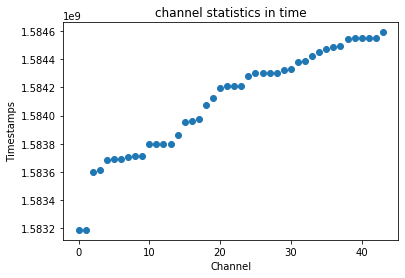

In [56]:

plt.title('channel statistics in time')
plt.ylabel("Timestamps")
plt.xlabel("Channel")

plt.plot(np.sort(created_dates),'o')

In [62]:
# convert each timestamp to 

df_channels['created'] =  pd.to_datetime(df_channels['created'],unit='s')#datetime.utcfromtimestamp(df_channels['created'].values.astype(int)/1000000000)#df_channels['created'].dt.to_pydatetime()

In [63]:
import plotly.express as px

#df = px.data.gapminder().query("country=='Canada'")
fig = px.line(df_channels, x="created", y="name", title='channel statistics')
fig.show()

In [64]:
fig = px.scatter(df_channels, x="created", y="name", title='channel statistics')
fig.show()

In [82]:
df_channels = df_channels.sort_values(by='created')

In [83]:
fig = px.scatter(df_channels, x="created", y="name", title='channel statistics')
fig.show()

# Visualise who is part of which channels

Using examples from https://plotly.com/python/parallel-categories-diagram/

In [69]:
import plotly.graph_objects as go
#example plot

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["A", "B", "C", "D"].values, #all names of channels # df_channels['name']
      color = "blue"
    ),
    link = dict(
      source = [0, 1, 0, 2, 3, 3], # indices correspond to labels, eg A1, A2, A2, B1, ...
      target = [2, 3, 3, 4, 4, 5], #example!!!!
      value = [8, 4, 2, 8, 4, 2]
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()

In [68]:
df_channels['name'].values

array(['announcements', 'research', 'prgm-collab-igem-team',
       'prgm-media-updates', 'repro-jung2020feb-primer-comparison',
       'prgm-communications-team', 'random', 'prgm-collab-opentrons-team',
       'prgm-biosafetyboard', 'prgm-governance-team',
       'prgm-open-lab-notebook', 'repro-sherlock', 'prgm-funding-team',
       'lab-notebook', 'prgm-metastudy-team', 'proj-repro-mammoth-crispr',
       'chlg-prevent-team', 'prgm-paperaccess', 'legal',
       'proj-environmental-monitoring', 'prgm-mammoth-multiplier',
       'proj-dev-ai-cough-detection', 'proj-aptamers',
       'proj-international-intervention',
       'proj-dev-open-source-resources', 'prgm-dev-team',
       'proj-ventilator', 'proj-humidity-anti-covid19-shield',
       'chlg-treatment-team', 'prgm-design-team', 'prgm-introductions',
       'prgm-ideas', 'prgm-hardware-team',
       'prgm-questions-support-feedback', 'chlg-detect-team',
       'chlg-implementation-team', 'proj-mask-team', 'chicago',
       'prgm

In [70]:
# let us make three lists of users for channels "annoucement", "general" - source, "all other" - target 

df_channels['members'].values



array([list(['UUNGFHSV8', 'UUNQ7H1MG', 'UUP8XJTH8', 'UUPF597H9', 'UUPFF4TC3', 'UUPQGNNTV', 'UUQM4L2AF', 'UUQR32JHG', 'UURGMNE3T', 'UURHGHB7T', 'UUS2G6N6M', 'UUSGW93R9', 'UUSKUHPEE', 'UUSMRLYH1', 'UUSPCUDL3', 'UUSV78MJN', 'UUTACBTSM', 'UUTSPUZH7', 'UUU098YEN', 'UUU7B6135', 'UUUB9RFQA', 'UUUEFQW8N', 'UUVC28VNW', 'UUVG81TD0', 'UUVK08BCJ', 'UUW05LBEV', 'UUW1Q644T', 'UUW41MYTV', 'UUWLPKCLB', 'UUWPKNE2E', 'UUWQU0D8T', 'UUWR0FJ7M', 'UUWSJTQ67', 'UUWUKTATD', 'UUX34JPLH', 'UUX7EP0HG', 'UUX8HFPR7', 'UUXTPFTD0', 'UUY5NSL2V', 'UUY9ND75X', 'UUYGC6ZHQ', 'UUYHN08TV', 'UUYSVHXTL', 'UUYTLGUFL', 'UUZ5ESJUR', 'UUZGNRNRH', 'UUZHHJVGR', 'UV02WET96', 'UV0ASBY3E', 'UV0BB32QL', 'UV0CX49QB', 'UV0FQT2QL', 'UV0GKVDUZ', 'UV0PCSG58', 'UV0QTJCMT', 'UV0RRGB6H', 'UV0S4MVDX', 'UV10KBUQG', 'UV120B2P7', 'UV13874FN', 'UV143JZD3', 'UV18Y0Q1Y', 'UV19CVA93', 'UV19H8E82', 'UV1A22N3W', 'UV1B17TQS', 'UV1BJFTAQ', 'UV1CX069G', 'UV1D3FJ0M', 'UV1D9NR1N', 'UV1G2M821', 'UV1JVH78D', 'UV1PJF1FC', 'UV1RE76NN', 'UV1V637PU', 'UV20M5HGQ',

In [77]:
df_annouce = df_channels[df_channels.name == 'announcements']
df_annouce['members'].values
#df_annouce.head()


array([list(['UUNGFHSV8', 'UUNQ7H1MG', 'UUP8XJTH8', 'UUPF597H9', 'UUPFF4TC3', 'UUPQGNNTV', 'UUQM4L2AF', 'UUQR32JHG', 'UURGMNE3T', 'UURHGHB7T', 'UUS2G6N6M', 'UUSGW93R9', 'UUSKUHPEE', 'UUSMRLYH1', 'UUSPCUDL3', 'UUSV78MJN', 'UUTACBTSM', 'UUTSPUZH7', 'UUU098YEN', 'UUU7B6135', 'UUUB9RFQA', 'UUUEFQW8N', 'UUVC28VNW', 'UUVG81TD0', 'UUVK08BCJ', 'UUW05LBEV', 'UUW1Q644T', 'UUW41MYTV', 'UUWLPKCLB', 'UUWPKNE2E', 'UUWQU0D8T', 'UUWR0FJ7M', 'UUWSJTQ67', 'UUWUKTATD', 'UUX34JPLH', 'UUX7EP0HG', 'UUX8HFPR7', 'UUXTPFTD0', 'UUY5NSL2V', 'UUY9ND75X', 'UUYGC6ZHQ', 'UUYHN08TV', 'UUYSVHXTL', 'UUYTLGUFL', 'UUZ5ESJUR', 'UUZGNRNRH', 'UUZHHJVGR', 'UV02WET96', 'UV0ASBY3E', 'UV0BB32QL', 'UV0CX49QB', 'UV0FQT2QL', 'UV0GKVDUZ', 'UV0PCSG58', 'UV0QTJCMT', 'UV0RRGB6H', 'UV0S4MVDX', 'UV10KBUQG', 'UV120B2P7', 'UV13874FN', 'UV143JZD3', 'UV18Y0Q1Y', 'UV19CVA93', 'UV19H8E82', 'UV1A22N3W', 'UV1B17TQS', 'UV1BJFTAQ', 'UV1CX069G', 'UV1D3FJ0M', 'UV1D9NR1N', 'UV1G2M821', 'UV1JVH78D', 'UV1PJF1FC', 'UV1RE76NN', 'UV1V637PU', 'UV20M5HGQ',

In [80]:
import plotly.express as px


df_channels['created'] =  pd.to_datetime(df_channels['created'],unit='s')
#df = px.data.tips()
fig = px.parallel_categories(df_channels, dimensions=['name', 'created', 'is_general'], #color="size", 
                             color_continuous_scale=px.colors.sequential.Inferno,
                labels={'name':'channel name', 'created':'creation date', 'property':'general'})
fig.show()